In [ ]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Le dossier ou il y a les fonctions crées
import sys
sys.path.append('../Functions')

In [ ]:
#Importation des fonctions utiles
from data_load import load_csv

In [ ]:
#Chargement des données
path_file=('/Données/stroke_data.csv')
df=pd.read_csv(path_file)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [ ]:
#Suppression du sexe 'other' dans la colonne 'gender' commen c'est très rare (un seul cas)
df=df[df['gender'] != 'Other']
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Binarisation des données de type 'objet'
df_encoded=pd.get_dummies(df, drop_first=True).astype('int')
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228,36,1,1,1,0,1,0,0,1,1,0,0
1,51676,61,0,0,202,28,1,0,1,0,0,1,0,0,0,1,0
2,31112,80,0,1,105,32,1,1,1,0,1,0,0,0,0,1,0
3,60182,49,0,0,171,34,1,0,1,0,1,0,0,1,0,0,1
4,1665,79,1,0,174,24,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
#Séparation des données features-cibles
X=df_encoded.drop('stroke', axis=1)
X=X.drop('id', axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,0,0,1,1,0,0
1,61,0,0,202,28,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,1,0,0,1,0,0,0,1,0


In [ ]:
#Séparation des données features-cibles
Y=df_encoded['stroke']
Y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [ ]:
#Séparation des données
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
#Création du modèle
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
#Application du modèle sur les données test
Y_predict=rf.predict(X_test)

In [ ]:
#Evaluation du modèle( rapprot de classification)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

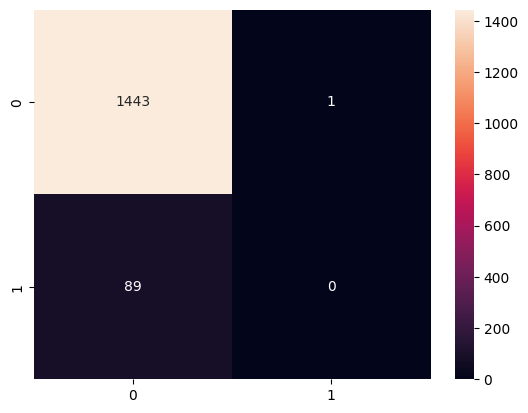

In [ ]:
#Evaluation du modèle (matrice de confusion)
cm=confusion_matrix(Y_test, Y_predict)
sb.heatmap(data=cm, annot=True, fmt='d')